In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.isna().any().any()

True

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [7]:
data.drop('id', axis=1, inplace=True)

In [8]:
data.isna().any().any()

False

In [10]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

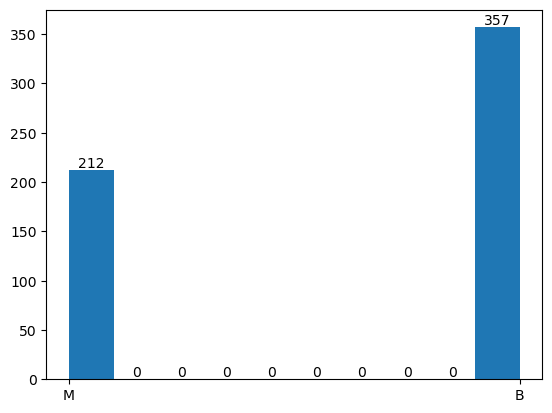

In [11]:
_, _, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [12]:
Y.replace('B', 0, inplace=True)

In [13]:
Y.replace('M', 1, inplace=True)

In [14]:
feature_names = X.columns

In [15]:
class_names = ['B', 'M']

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
def report(model, x, y, text='train'):
    print(f'{text}\t |\t {type(model).__name__}')
    print('-'*60)
    print(classification_report(y, model.predict(x)))
    print('-'*60)
    print(pd.DataFrame(confusion_matrix(y, model.predict(x)), index=class_names, columns=class_names))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train)

MinMaxScaler()

In [23]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)

In [24]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

In [25]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.213877,0.295570,0.203787,0.111941,0.306671,0.124318,0.061809,0.102833,0.390909,0.192797,...,0.179296,0.278252,0.162907,0.079557,0.311233,0.075298,0.064736,0.224880,0.231618,0.064476
1,0.646457,0.258370,0.628913,0.505408,0.316682,0.270597,0.357779,0.444384,0.258081,0.096186,...,0.620420,0.297175,0.579660,0.432757,0.561514,0.269921,0.332188,0.725773,0.221565,0.101732
2,0.229968,0.312141,0.219197,0.120679,0.259689,0.152199,0.062535,0.069235,0.238889,0.218856,...,0.191035,0.345682,0.173365,0.088749,0.375289,0.155922,0.117492,0.237560,0.191208,0.163256
3,0.234701,0.288468,0.220579,0.124751,0.199227,0.086283,0.046204,0.067048,0.408081,0.230085,...,0.183920,0.248134,0.165646,0.084054,0.285478,0.059930,0.073506,0.216357,0.240489,0.124885
4,0.260732,0.241461,0.244627,0.143415,0.224006,0.058156,0.010480,0.031923,0.078283,0.137500,...,0.192458,0.204957,0.169680,0.088232,0.259064,0.021577,0.015479,0.095670,0.069387,0.043946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.286289,0.294555,0.268261,0.161315,0.270790,0.056070,0.060028,0.145278,0.205556,0.177754,...,0.191035,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618
422,0.232335,0.387555,0.225278,0.123139,0.349093,0.189620,0.059864,0.108300,0.484343,0.268220,...,0.182142,0.404851,0.172718,0.082997,0.471703,0.185707,0.092971,0.283952,0.297654,0.121147
423,0.284869,0.521474,0.268261,0.159788,0.209932,0.096160,0.028257,0.087575,0.306566,0.090042,...,0.228033,0.529318,0.202450,0.108951,0.334346,0.079567,0.035639,0.203471,0.146067,0.051620
424,0.341663,0.365911,0.335982,0.201442,0.265636,0.280412,0.118627,0.151988,0.225253,0.208686,...,0.303095,0.406183,0.307236,0.158106,0.291422,0.306206,0.200639,0.460137,0.191011,0.154401


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# model with default parameters
model = KNeighborsClassifier()

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
report(model, X_train, y_train)

train	 |	 KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426

------------------------------------------------------------
     B    M
B  266    1
M    8  151


In [30]:
report(model, X_test, y_test, 'test')

test	 |	 KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

------------------------------------------------------------
    B   M
B  90   0
M   4  49


In [31]:
model = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')

In [32]:
model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [34]:
report(model, X_train, y_train)

train	 |	 KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [35]:
report(model, X_test, y_test, 'test')

test	 |	 KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

------------------------------------------------------------
    B   M
B  90   0
M   4  49


In [36]:
from sklearn.model_selection import GridSearchCV

In [40]:
params = {
    'n_neighbors': range(10,50, 5),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [41]:
estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=15, verbose=5)

In [42]:
estimator.fit(X_train, y_train)

Fitting 15 folds for each of 32 candidates, totalling 480 fits
[CV 1/15] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/15] END n_neighbors=10, p=1, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/15] END n_neighbors=10, p=1, weights=uniform;, score=0.966 total time=   0.0s
[CV 4/15] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/15] END n_neighbors=10, p=1, weights=uniform;, score=0.966 total time=   0.0s
[CV 6/15] END n_neighbors=10, p=1, weights=uniform;, score=0.966 total time=   0.0s
[CV 7/15] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 8/15] END n_neighbors=10, p=1, weights=uniform;, score=0.929 total time=   0.0s
[CV 9/15] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 10/15] END n_neighbors=10, p=1, weights=uniform;, score=0.929 total time=   0.0s
[CV 11/15] END n_neighbors=10, p=1, weights=uniform;, score=0.929 total time=   0.0s
[CV 12/15] 

[CV 15/15] END n_neighbors=15, p=2, weights=distance;, score=0.964 total time=   0.0s
[CV 1/15] END n_neighbors=20, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/15] END n_neighbors=20, p=1, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/15] END n_neighbors=20, p=1, weights=uniform;, score=0.966 total time=   0.0s
[CV 4/15] END n_neighbors=20, p=1, weights=uniform;, score=0.966 total time=   0.0s
[CV 5/15] END n_neighbors=20, p=1, weights=uniform;, score=0.931 total time=   0.0s
[CV 6/15] END n_neighbors=20, p=1, weights=uniform;, score=0.966 total time=   0.0s
[CV 7/15] END n_neighbors=20, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 8/15] END n_neighbors=20, p=1, weights=uniform;, score=0.964 total time=   0.0s
[CV 9/15] END n_neighbors=20, p=1, weights=uniform;, score=0.964 total time=   0.0s
[CV 10/15] END n_neighbors=20, p=1, weights=uniform;, score=0.929 total time=   0.0s
[CV 11/15] END n_neighbors=20, p=1, weights=uniform;, score=0.929 total t

[CV 6/15] END n_neighbors=30, p=1, weights=distance;, score=0.966 total time=   0.0s
[CV 7/15] END n_neighbors=30, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 8/15] END n_neighbors=30, p=1, weights=distance;, score=0.964 total time=   0.0s
[CV 9/15] END n_neighbors=30, p=1, weights=distance;, score=0.964 total time=   0.0s
[CV 10/15] END n_neighbors=30, p=1, weights=distance;, score=0.929 total time=   0.0s
[CV 11/15] END n_neighbors=30, p=1, weights=distance;, score=0.929 total time=   0.0s
[CV 12/15] END n_neighbors=30, p=1, weights=distance;, score=0.929 total time=   0.0s
[CV 13/15] END n_neighbors=30, p=1, weights=distance;, score=0.893 total time=   0.0s
[CV 14/15] END n_neighbors=30, p=1, weights=distance;, score=0.929 total time=   0.0s
[CV 15/15] END n_neighbors=30, p=1, weights=distance;, score=0.964 total time=   0.0s
[CV 1/15] END n_neighbors=30, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/15] END n_neighbors=30, p=2, weights=uniform;, score=0

[CV 12/15] END n_neighbors=40, p=2, weights=uniform;, score=0.893 total time=   0.0s
[CV 13/15] END n_neighbors=40, p=2, weights=uniform;, score=0.929 total time=   0.0s
[CV 14/15] END n_neighbors=40, p=2, weights=uniform;, score=0.964 total time=   0.0s
[CV 15/15] END n_neighbors=40, p=2, weights=uniform;, score=0.964 total time=   0.0s
[CV 1/15] END n_neighbors=40, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 2/15] END n_neighbors=40, p=2, weights=distance;, score=0.931 total time=   0.0s
[CV 3/15] END n_neighbors=40, p=2, weights=distance;, score=0.966 total time=   0.0s
[CV 4/15] END n_neighbors=40, p=2, weights=distance;, score=0.966 total time=   0.0s
[CV 5/15] END n_neighbors=40, p=2, weights=distance;, score=0.931 total time=   0.0s
[CV 6/15] END n_neighbors=40, p=2, weights=distance;, score=0.966 total time=   0.0s
[CV 7/15] END n_neighbors=40, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 8/15] END n_neighbors=40, p=2, weights=distance;, score=0.964

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=5)

In [43]:
estimator.best_estimator_

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [44]:
model = estimator.best_estimator_

In [45]:
report(model, X_train, y_train)

train	 |	 KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [48]:
entitet_test = X_test.iloc[0]

In [55]:
entitet_test

radius_mean                0.576885
texture_mean               0.510315
perimeter_mean             0.612328
area_mean                  0.415483
smoothness_mean            0.345822
compactness_mean           0.694497
concavity_mean             0.483833
concave points_mean        0.555666
symmetry_mean              0.675253
fractal_dimension_mean     0.588136
radius_se                  0.305631
texture_se                 0.708937
perimeter_se               0.485935
area_se                    0.204330
smoothness_se              0.048475
compactness_se             0.775032
concavity_se               0.224495
concave points_se          0.774768
symmetry_se                0.520037
fractal_dimension_se       0.412683
radius_worst               0.463536
texture_worst              0.477612
perimeter_worst            0.504457
area_worst                 0.281852
smoothness_worst           0.214819
compactness_worst          0.352194
concavity_worst            0.290655
concave points_worst       0

In [57]:
# model.predict(entitet_test.to_numpy())

In [52]:
report(model, X_train, y_train)

train	 |	 KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [53]:
report(model, X_test, y_test, 'test')

test	 |	 KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

------------------------------------------------------------
    B   M
B  90   0
M   3  50
